In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.sample(7)

,cgpa,placement_exam_marks,placed
689,8.02,67.0,0
849,7.89,8.0,1
52,7.53,27.0,1
559,6.61,58.0,1
301,7.84,5.0,1
335,6.90,17.0,1
178,7.51,39.0,0


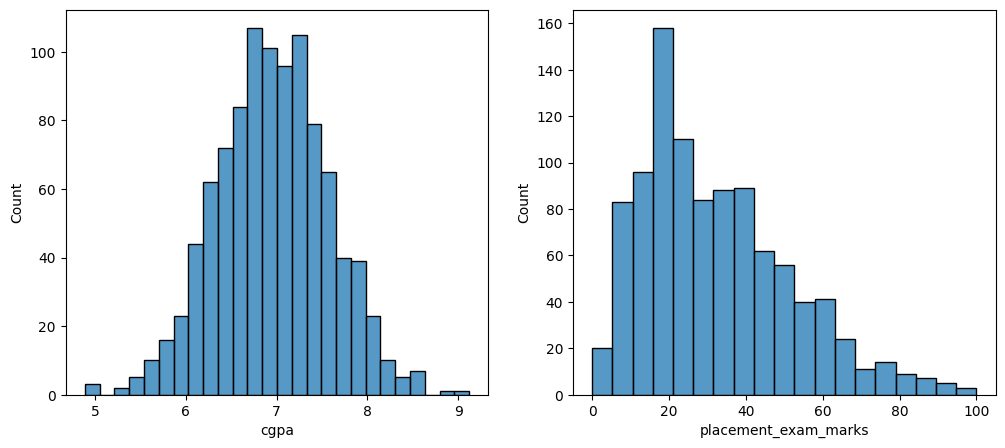

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

In [9]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

## detection of outlier

In [10]:
#Since Z score method works for normal distribution, now we can only use cgpa column
#finding booundaries

print("Highest:", df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest:", df['cgpa'].mean() - 3*df['cgpa'].std())



Highest: 8.808933625397168
Lowest: 5.113546374602832


In [13]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Handling Outlier

In [15]:
#Method 1

trimmed_df= df[(df['cgpa'] < 8.80) & (df['cgpa']>5.11)]
trimmed_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [16]:
#method 2:capping

Upper_limit=df['cgpa'].mean() + 3*df['cgpa'].std()
Lower_limit=df['cgpa'].mean() - 3*df['cgpa'].std()

In [27]:
df['cgpa']=np.where(df['cgpa']>Upper_limit, Upper_limit, np.where(df['cgpa']<Lower_limit, Lower_limit, df['cgpa']))

In [28]:
df.shape

(1000, 4)

In [30]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64